# Temperature Fluctuations in Walls

In [2]:
import numpy as np
import matplotlib.pyplot as plt

To solve the heat conduction equation on plane parallel geometries (e.g. homogeneous walls with thickness $d$), we again assume harmonic temperature changes on the surfaces (left surface at $x = - d/2$, right surface at $x = d/2$). As an approach, we use the solution of the semi-infinite space on both sides. After a superposition of these, which must fulfil the boundary conditions, we obtain for the temperature within the wall

$$
  \vartheta(x, t) = \frac{\text{e}^{i \omega t}}{\text{sinh}(\^d)} (\Delta \vartheta_R\,  \text{sinh}(\^x + \^d / 2) -
                  \Delta \vartheta_L\,  \text{sinh}(\^x - \^d / 2))
$$

with $\^x = \frac{x}{\sigma} (1 + i)$ and $\^d = \frac{d}{\sigma} (1 + i)$. $\Delta \vartheta_R$ and $\Delta \vartheta_L$ are the temperature amplitudes at the corresponding surface, respectively. 

The following plot shows an example.

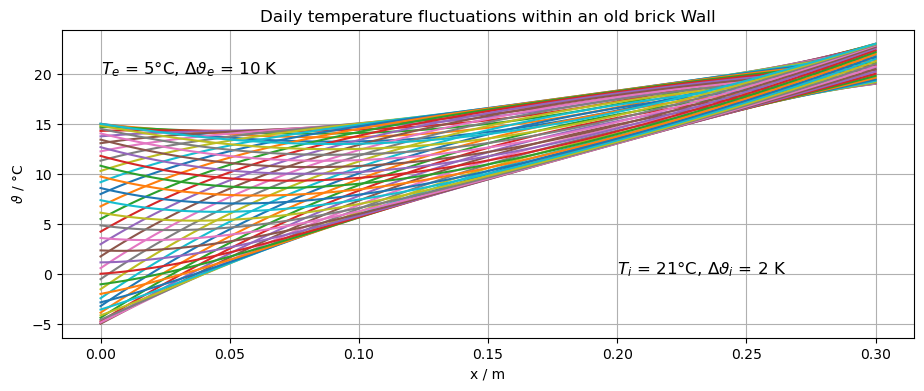

In [68]:
# --------------- bondary conditions -----------------------
Te   = 5
Ti   = 21
dT_e = 10  # outsise temperature amplitude 
dT_i = 2  # inside 

# -------------- material an system properties --------------
lam    = 0.5
rho_cp = 1000 * 1000

T      = 24 * 3600 # period
omega  = 2 * np.pi / T

a      = lam / rho_cp
sigma  = (T / np.pi * a)**0.5
d      = 0.3 # wall thickness
Nx     = 100
x      = np.linspace(-d/2, d/2, Nx) # x coordinate within the wall; x=0 represents exterior surface
x      = x 
Nt     = 100
t      = np.linspace(0, T, Nt)

# ----------------- dimensionless sizes
dd     = d / sigma * (1 + 1j)  
xd     = x / sigma * (1 + 1j)

theta = np.zeros((Nx, Nt)).astype(complex)
theta_stat = Te + (x + d/2) / d * (Ti - Te)     # stationary part
for nt in range(0, Nt):
    theta[:, nt] = np.exp(1j * omega * t[nt]) / np.sinh(dd) * (dT_i * np.sinh(xd[:] + dd/2) - dT_e * np.sinh(xd[:] - dd/2)) + theta_stat[:]
    
fig = plt.figure(figsize=(11, 4))
for nt in range(0, Nt, 2):
    plt.plot(x + d/2, np.real(theta[:, nt]))
plt.title('Daily temperature fluctuations within an old brick Wall')
text_e = '$T_e$ = ' + str(Te) + '°C, ' + r'$\Delta \vartheta_e$ = ' + str(dT_e) + ' K'
text_i = '$T_i$ = ' + str(Ti) + '°C, ' + r'$\Delta \vartheta_i$ = ' + str(dT_i) + ' K'
plt.text(0,  20, text_e, fontsize = 12) # figure coordinates are used!
plt.text(0.2, 0, text_i, fontsize = 12)
plt.xlabel('x / m')
plt.ylabel(r'$\vartheta$ / °C')
plt.grid()
plt.show()

```{admonition} Tasks
:class: full-width

- discuss the temperature profile.

- how large is the penetration depth?

- calculate the flux amplitudes at both boundaries for the above case.

- modify the material properties (start the rocket button...) and look what happens!
```